# ¿Cat or Dog?

## Import libraries

In [1]:
import os
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential, load_model
from keras.utils import set_random_seed
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
import numpy as np


2024-01-04 18:08:13.794358: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 18:08:16.213035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 18:08:16.213134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 18:08:16.552758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 18:08:17.291613: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 18:08:17.292334: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Show pictures

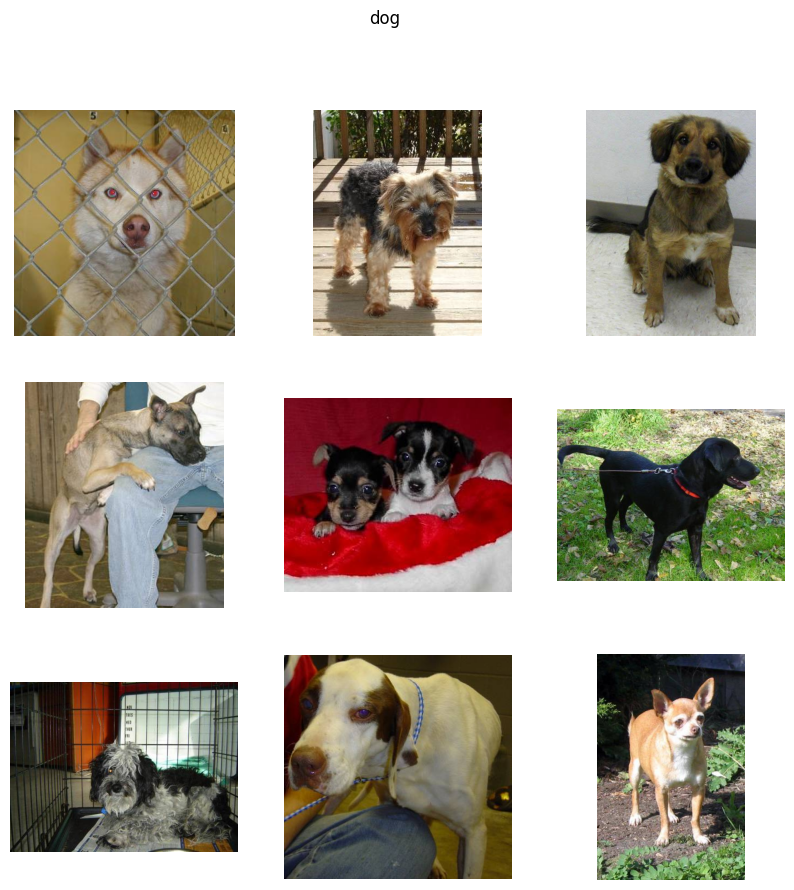

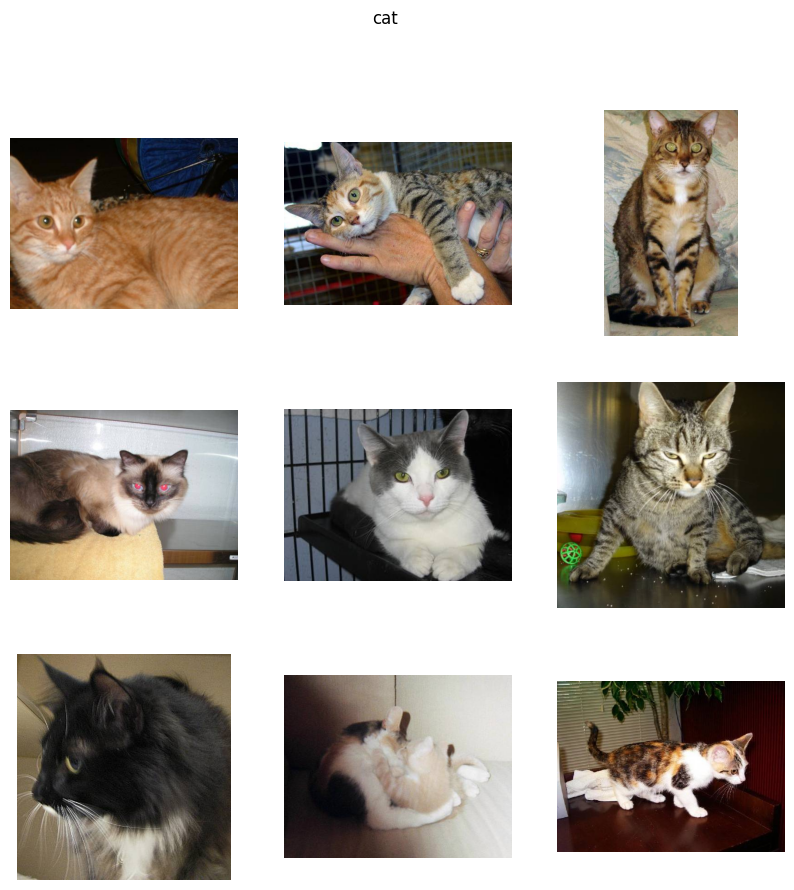

In [2]:
# Paths to the folders containing the images
carpetas_imagenes = [
    "/workspaces/deap_l_proyect/data/raw/train/dog",
    "/workspaces/deap_l_proyect/data/raw/train/cat"
]

# Show the first 9 images in each folder
num_imagenes_a_mostrar = 9

for carpeta_imagenes in carpetas_imagenes:
    # Get the list of files in the folder.
    archivos = os.listdir(carpeta_imagenes)

    # Select only the files with image extensions (e.g., jpg, png).
    imagenes = [archivo for archivo in archivos if archivo.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Show the first 9 images in this folder.
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    for i in range(num_imagenes_a_mostrar):
        # Load the image
        ruta_imagen = os.path.join(carpeta_imagenes, imagenes[i])
        img = imread(ruta_imagen)

        # Display the image in the corresponding subplot
        axs[i // 3, i % 3].imshow(img)
        # Hide axes
        axs[i // 3, i % 3].axis('off') 

    # Title with the folder's name.
    plt.suptitle(os.path.basename(carpeta_imagenes))
    plt.show()


## Import Data

In [3]:
# Define a few rules for DataGen
train_dir = '/workspaces/deap_l_proyect/data/raw/train'
test_dir = '/workspaces/deap_l_proyect/data/raw/test1'
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['dog', 'cat'] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


## Model

In [4]:
set_random_seed(24)

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

2023-12-20 06:08:14.737364: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2023-12-20 06:08:15.254768: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2023-12-20 06:08:15.395899: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2023-12-20 06:08:15.642143: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-12-20 06:08:15.722517: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


In [5]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])
model

In [6]:
model.fit(train_data, epochs = 1 )

782/782 [==============================] - 24782s 32s/step - loss: 10.6981 - accuracy: 0.5013


In [7]:
# Save model
model.save("/workspaces/deap_l_proyect/models/keras_200x200-4096-2_24.keras")

In [4]:
# Load model
model = load_model("/workspaces/deap_l_proyect/models/keras_200x200-4096-2_24.keras")

2024-01-04 11:20:30.667524: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-01-04 11:20:31.120286: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-01-04 11:20:31.250338: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-01-04 11:20:31.449254: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-01-04 11:20:31.529882: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


## Accuracy

In [8]:
_, accuracy = model.evaluate(train_data)

print(f"Accuracy: {accuracy}")

782/782 [==============================] - 7009s 9s/step - loss: 0.6933 - accuracy: 0.5000
Accuracy: 0.5


In [6]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

print('\nTest accuracy:', test_acc)

391/391 - 3577s - loss: 1.3866 - accuracy: 1.0000 - 3577s/epoch - 9s/step

Test accuracy: 1.0


## Optimized model

In [5]:
# Saving the best model using checkpoints
checkpoint = ModelCheckpoint("/workspaces/deap_l_proyect/models/vgg16_1.h5", 
                             monitor = "val_accuracy", 
                             verbose = 1, save_best_only = True, 
                             save_weights_only = False, 
                             mode = "auto")

# Stopping the training early if validation accuracy doesn't improve
early = EarlyStopping(monitor = "val_accuracy", 
                    patience = 3, 
                    verbose = 1, 
                    mode = "auto")

# Fitting the model on the training data with defined callbacks        
hist = model.fit(train_data, 
                steps_per_epoch = 100, 
                validation_data = test_data, 
                validation_steps = 10, 
                epochs = 3, 
                callbacks = [checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5016 
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /workspaces/deap_l_proyect/models/vgg16_1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 3340s 33s/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 1.3864 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5063 
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 3326s 33s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 1.3864 - val_accuracy: 1.0000
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4875 
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 3290s 33s/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 1.3863 - val_accuracy: 1.0000


## Accuracy plot

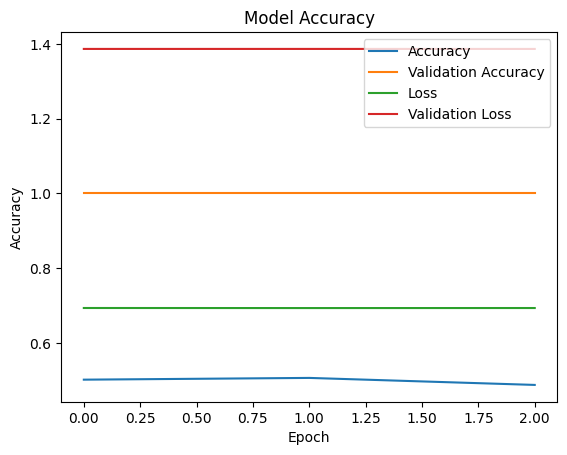

In [6]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

## Predict

2024-01-04 18:09:00.114276: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-01-04 18:09:00.567456: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-01-04 18:09:00.709622: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-01-04 18:09:00.934276: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-01-04 18:09:01.014689: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


1/1 [==============================] - 2s 2s/step
Dog


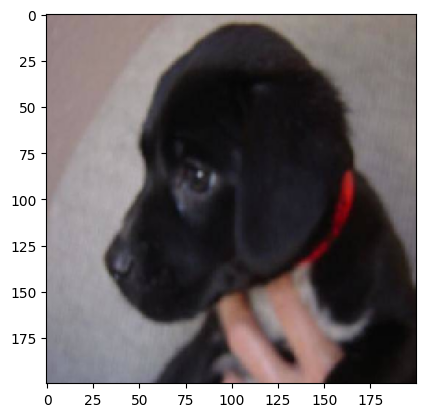

In [4]:
# Load a test image from the test folder.
img = image.load_img("/workspaces/deap_l_proyect/data/raw/test1/test1/3045.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# Load the pre-trained model
saved_model = load_model("/workspaces/deap_l_proyect/models/vgg16_1.h5")

# Make predictions on the test image,
output = saved_model.predict(img)

# Determine the predicted class
if output[0][0] > output[0][1]:
    print("Dog")
else:
    print("Cat")